In [507]:
words = open('makemore/names.txt', 'r').read().splitlines()

In [784]:
from sklearn.model_selection import train_test_split

# Assuming words is your list of names
words_train, words_test = train_test_split(words, test_size=0.2, random_state=420)
words_dev, words_test = train_test_split(words_test, test_size=0.5, random_state=420)

In [683]:
len(words_train)

25626

In [508]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [686]:
len(words_train)

25626

In [688]:
len(words_dev)

3203

In [687]:
len(words_test)

3204

In [510]:
min(len(w) for w in words)

2

In [511]:
max(len(w) for w in words)

15

In [512]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [513]:
sorted(b.items(), key=lambda x: x[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [514]:
import torch

In [515]:
N = torch.zeros((27, 27), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [516]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [517]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [518]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1        


N
N.shape

torch.Size([27, 27])

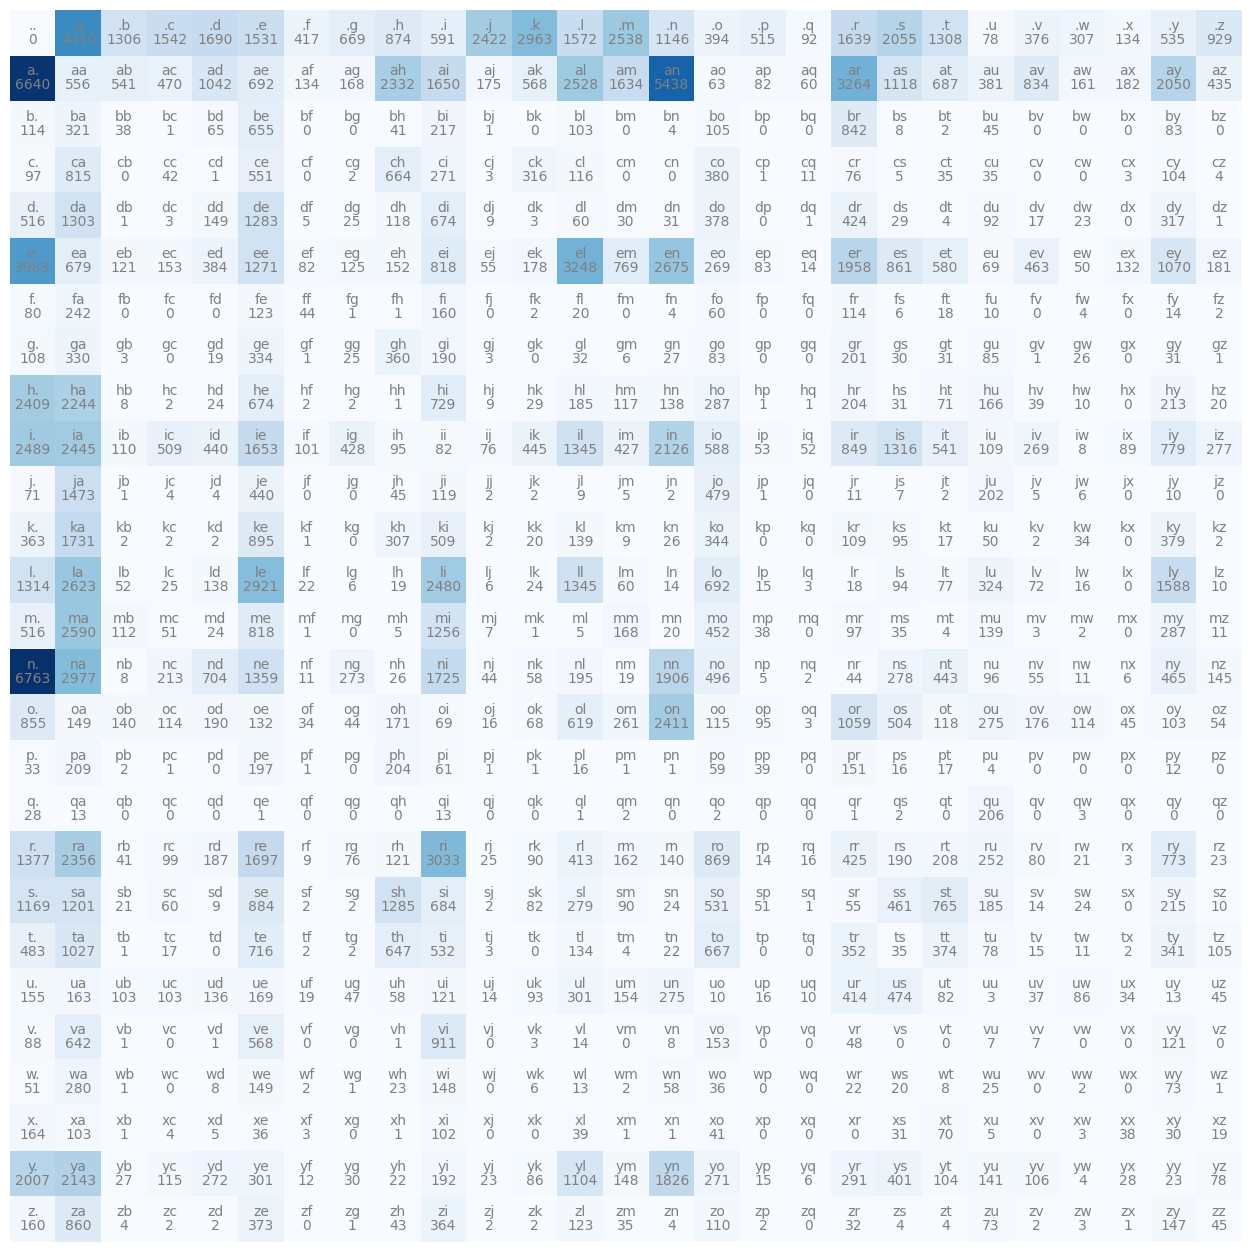

In [519]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [520]:
N[0, :].shape

torch.Size([27])

In [521]:
N.float().sum(1, keepdim=True).shape

torch.Size([27, 1])

In [522]:
P = (N + 1).float()
P /= P.sum(1,keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [523]:
P[0].sum()

tensor(1.)

In [524]:
g = torch.Generator().manual_seed(2147483647)
def get_next(ix):
    p = P[ix]
    return torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

In [525]:
g = torch.Generator().manual_seed(2147483647)
def get_next(ix):
    p = P[ix]
    return torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

def gen_word():
    word = ""
    last = 0
    while True:
        next = get_next(last)
        if next == 0:
            return word
        word += itos[next]
        last = next
    return word


In [526]:
for i in range(100):
    print(gen_word())

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja
feniee
zem
deru
firit
gaikajahahbevare
kiysthelenaririenah
keen
x
al
kal
thavazeeromysos
laitenimieegariseriyen
k
illeleldole
meenisammigama
mmin
asharin
alcalar
jayn
asaz
selanely
chay
rana
ai
yviamisashougen
l
beyncaro
allan
annutetoradrilia
rddeman
me
vifahevara
jala
j
gh
cryalan
rlaylmacondo
pera
yd
en
aienossin
me
jancla
tiesel
jedahzynaleroneritotturiron
cri
alkismeamere
morad
lieintamaamnnf
miayuleonteadajeya
renari
x
keika
s
ynn
miudawa
chahan
jondelie
kedariza
lha
denoni
kar
kavanista
kesorrlilaa
lelike
ssh
drl
rcagalaicalasion
avallciny
boh
en
caikeladeradefwiea
fes
malolela
liy
elan
jalinain
rmayoadish
con
alomaruikeee


In [527]:
log_likelyhood = 0.0
n = 0
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # There is an underlying distribution
        # we sample that
        # to derive
        # the likelihood is just a score of how close our model is to modeling the underlying distribution.
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'log likelyhood: {log_likelyhood:.4f}')
nll = -log_likelyhood
print(f'nll: {nll:.4f}')
print(f'{nll/n}')


.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
log likelyhood: -12.5716
nll: 12.5716
2.5143284797668457


Goal: maximize likelihood

max log-likelihood

min negative log-likelihood


min average negative log likelihood

In [528]:
def compute_nll(w):
    chs = ['.'] + list(w) + ['.']
    log_likelyhood = 0
    n = 0
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
    return -log_likelyhood, n

In [529]:
total = 0.0
n = 0
names = {}
for w in words:
    nll, i = compute_nll(w)
    n += i
    total += nll
    names[w] = (nll/i).item()
    # print(f'{nll:.4f} {w}')
print(f'Average NLL: {total/n:.4f}')

# print most likely names:
sorted(names.items(), key=lambda x: x[1])

Average NLL: 2.4546


[('jan', 1.524251937866211),
 ('man', 1.5774178504943848),
 ('an', 1.6039714813232422),
 ('jon', 1.6457202434539795),
 ('kanan', 1.6552863121032715),
 ('manan', 1.6597400903701782),
 ('jahan', 1.666451096534729),
 ('anan', 1.6921367645263672),
 ('jarian', 1.6931501626968384),
 ('jarin', 1.6936031579971313),
 ('mahan', 1.7018951177597046),
 ('ma', 1.7039237022399902),
 ('jana', 1.7095754146575928),
 ('mann', 1.7147976160049438),
 ('karan', 1.7182989120483398),
 ('marian', 1.7235307693481445),
 ('karin', 1.7245932817459106),
 ('jalan', 1.7277063131332397),
 ('shan', 1.728946328163147),
 ('marin', 1.7290472984313965),
 ('jayan', 1.7370773553848267),
 ('kannan', 1.7422904968261719),
 ('kelan', 1.7424935102462769),
 ('ahan', 1.742722749710083),
 ('jalen', 1.7436925172805786),
 ('kana', 1.7467635869979858),
 ('jaron', 1.74740469455719),
 ('mana', 1.7521082162857056),
 ('chan', 1.7529640197753906),
 ('aman', 1.7578933238983154),
 ('kalan', 1.758696436882019),
 ('jamarian', 1.7588448524475098)

In [530]:
names = {}
for i in range(100):
    word = gen_word()
    nll, n = compute_nll(word)
    names[word] = (nll/n).item()

sorted(names.items(), key=lambda x: x[1])

[('an', 1.6039714813232422),
 ('a', 1.807007074356079),
 ('min', 1.8308117389678955),
 ('jaylian', 1.849413275718689),
 ('mon', 1.8543758392333984),
 ('jen', 1.876796007156372),
 ('ben', 1.9090471267700195),
 ('sh', 1.9151344299316406),
 ('ke', 1.9164432287216187),
 ('kay', 1.9613831043243408),
 ('anava', 2.060666561126709),
 ('chay', 2.0654807090759277),
 ('be', 2.0799975395202637),
 ('jaromavele', 2.0832743644714355),
 ('sin', 2.084944725036621),
 ('ra', 2.096585273742676),
 ('ahava', 2.1028213500976562),
 ('ri', 2.123206377029419),
 ('klenn', 2.1386427879333496),
 ('brorinahahra', 2.149179220199585),
 ('jas', 2.154715061187744),
 ('farariarya', 2.1597259044647217),
 ('nalia', 2.180920124053955),
 ('br', 2.1921942234039307),
 ('on', 2.196269989013672),
 ('demolerily', 2.2369134426116943),
 ('danamongri', 2.256422519683838),
 ('yn', 2.2564923763275146),
 ('daen', 2.261632204055786),
 ('jemi', 2.2772488594055176),
 ('laryusha', 2.2953972816467285),
 ('khelababelickayna', 2.303222417831

In [531]:
# create the training set of all the bigramms (x, y)
xs, ys = [], []


for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [532]:
xs

tensor([ 0,  5, 13, 13,  1])

In [533]:
ys

tensor([ 5, 13, 13,  1,  0])

In [534]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [535]:
xenc.shape

torch.Size([5, 27])

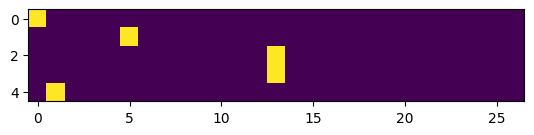

In [536]:
plt.imshow(xenc)

In [537]:
W = torch.randn((27, 27))

logits = xenc @ W # log-counts aka logits

# Softmax
counts = logits.exp() # equivalent N
probs = counts / counts.sum(dim=1, keepdim=True) # normalize

# (5, 27) @ (27, 1) -> (5, 1)
# (5, 27) @ (27, 27) -> (5, 27)
probs

tensor([[0.0886, 0.0241, 0.0169, 0.0048, 0.0193, 0.0390, 0.0118, 0.0043, 0.0277,
         0.0278, 0.0470, 0.0119, 0.0130, 0.0275, 0.0294, 0.0160, 0.1590, 0.0149,
         0.1006, 0.0297, 0.0362, 0.0476, 0.0163, 0.0270, 0.0312, 0.0484, 0.0800],
        [0.0477, 0.0054, 0.0065, 0.0383, 0.0090, 0.0066, 0.0410, 0.0099, 0.0252,
         0.0740, 0.0433, 0.1197, 0.0095, 0.0208, 0.0346, 0.1387, 0.0127, 0.0571,
         0.0200, 0.1193, 0.0266, 0.0162, 0.0378, 0.0201, 0.0329, 0.0016, 0.0255],
        [0.0279, 0.0475, 0.0301, 0.0180, 0.0140, 0.1416, 0.0049, 0.0274, 0.0607,
         0.0051, 0.0079, 0.0204, 0.0226, 0.0502, 0.0300, 0.0418, 0.0130, 0.0041,
         0.0858, 0.1691, 0.0161, 0.0206, 0.0159, 0.0141, 0.0100, 0.0765, 0.0247],
        [0.0279, 0.0475, 0.0301, 0.0180, 0.0140, 0.1416, 0.0049, 0.0274, 0.0607,
         0.0051, 0.0079, 0.0204, 0.0226, 0.0502, 0.0300, 0.0418, 0.0130, 0.0041,
         0.0858, 0.1691, 0.0161, 0.0206, 0.0159, 0.0141, 0.0100, 0.0765, 0.0247],
        [0.0137, 0.2065,

In [538]:
probs.shape

torch.Size([5, 27])

In [539]:
probs[0].sum()

tensor(1.0000)

In [823]:
# given tensor of n indicies from zero to num_classes, produces n row vectors of dimension num_classes
# aka a tensor of shape (n, num_classes)
F.one_hot(torch.tensor([0, 1]), num_classes=3)

tensor([[1, 0, 0],
        [0, 1, 0]])

In [540]:
def compute_nll(W, word):
    xs = []
    ys = []
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
    # token-indicies of word
    xs = torch.tensor(xs) # (n: {27})

    # token-indicies of next letter for word
    ys = torch.tensor(ys) # (n: {27})

    xenc = F.one_hot(torch.tensor(xs), num_classes=27).float() # (n, 27)

    # W is (27, 27)

    # We get the log-counts
    # aka log-counts
    logits = xenc @ W # log-counts, (n, 27)

    # softmax:

    # counts:
    # equivalent to N, the bigram matrix.
    counts = logits.exp()  # (n, 27)

    # normalize across row
    # these are the output probabilities
    # for each n characters, we have 27 values representing the probabilities
    probs = counts / counts.sum(dim=1, keepdim=True) # probs

    # here go through each token one by one
    # and sum up a loss score.

    nlls = torch.zeros(len(xs))
    for i in range(len(xs)):
        x = xs[i].item()
        print("input: ", x)
        y = ys[i].item()
        print("actual output: ", y)
        print("output probabilities from the nn:", probs[i])

        # Get computed probability of the truth
        # this happens to also fit the definition of "likelihood" -- how likely does the model predict the output?
        # Thinks result with low probability: model is pretty off, model is unlikely.
        # Thinks result with high probability: model is pretty on, model is likely.

        p = probs[i, y]


        print("probability of the actual output:", p.item())

        # We compute (negative) log-likelihood because
        # it's more numerically stable. instead of multiplying small likelyhoods (extremely numerically unstable), 
        # we can add likelyhoods (very numerically stable).
        # log(x) is negative until 1 -- log(1) == 0. probabilities can never go beyond 1, so here we make everything negative.
        # then we flip the sign. so we can "minimize loss". 

        logp = torch.log(p)
        print("log-likelihood of actual output: ", logp.item())

        # nll
        nll = -logp

        print("negative log-likelihood of actual output: ", nll.item())
        nlls[i] = nll
    return nlls.mean().item()

    # Actual




# W = torch.randn((27, 27))
compute_nll(W, "emma")

input:  0
actual output:  5
output probabilities from the nn: tensor([0.0886, 0.0241, 0.0169, 0.0048, 0.0193, 0.0390, 0.0118, 0.0043, 0.0277,
        0.0278, 0.0470, 0.0119, 0.0130, 0.0275, 0.0294, 0.0160, 0.1590, 0.0149,
        0.1006, 0.0297, 0.0362, 0.0476, 0.0163, 0.0270, 0.0312, 0.0484, 0.0800])
probability of the actual output: 0.03901434689760208
log-likelihood of actual output:  -3.243825912475586
negative log-likelihood of actual output:  3.243825912475586
input:  5
actual output:  13
output probabilities from the nn: tensor([0.0477, 0.0054, 0.0065, 0.0383, 0.0090, 0.0066, 0.0410, 0.0099, 0.0252,
        0.0740, 0.0433, 0.1197, 0.0095, 0.0208, 0.0346, 0.1387, 0.0127, 0.0571,
        0.0200, 0.1193, 0.0266, 0.0162, 0.0378, 0.0201, 0.0329, 0.0016, 0.0255])
probability of the actual output: 0.020763058215379715
log-likelihood of actual output:  -3.874579906463623
negative log-likelihood of actual output:  3.874579906463623
input:  13
actual output:  13
output probabilities from 

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/1181729346.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()


3.4890198707580566

In [541]:
xs

tensor([ 0,  5, 13, 13,  1])

In [542]:
ys

tensor([ 5, 13, 13,  1,  0])

In [543]:
probs.shape
probs[torch.arange(5), ys]
# What is this?
# indexing with torch.tensor(ys)
# which is the same as 
# 

# probs @ F.one_hot(torch.tensor(ys), num_classes=27).T.float()

tensor([0.0390, 0.0208, 0.0502, 0.0475, 0.0137])

In [703]:
W = torch.randn((27, 27), requires_grad=True)



In [704]:
def compute_nll(W, word):
    xs = []
    ys = []
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
    logits = xenc @ W # log-counts
    # softmax
    counts = logits.exp() # equivalent to N
    probs = counts / counts.sum(dim=1, keepdim=True) # probs
    loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01 * W.pow(2).mean()

    # backpropagate
    W.grad = None
    loss.backward()

    return loss, W.grad


g = torch.Generator().manual_seed(2147483647)
def gen_word(W):
    word = ""
    last = 0
    counts = W.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    while True:
        next = torch.multinomial(probs[last], num_samples=1, replacement=True, generator=g).item()
        if next == 0:
            return word
        word += itos[next]
        last = next



losses = []
# for w in [words[0] for _ in range(10)]:
for w in words_test:
    loss, grad = compute_nll(W, w)
    # We want to move W in the direction of the negative gradient
    # aka when values get smaller.
    W.data += -0.1 * grad 
    print(f'{loss.item():.4}')
    losses.append(loss.item())

    # print([gen_word(W) for _ in range(5)])

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3773646611.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()


3.862
3.346
3.754
4.018
3.675
3.756
3.493
3.523
3.297
3.69
4.185
3.778
3.587
4.477
3.493
2.943
3.388
4.226
4.203
3.154
4.007
3.303
2.707
3.777
2.83
2.699
3.51
3.607
3.772
3.524
2.949
3.646
3.453
3.784
3.839
3.995
3.539
3.622
3.641
3.245
3.577
3.241
3.658
3.389
3.104
3.604
3.322
4.147
2.84
4.072
4.038
4.371
4.398
3.516
3.602
4.273
3.115
3.216
3.555
3.839
3.782
3.056
3.632
3.474
4.167
3.976
3.7
3.83
3.137
3.808
3.706
3.336
3.154
3.27
4.32
3.741
3.236
3.436
3.202
2.995
4.409
3.132
3.475
3.267
3.797
3.885
3.441
3.594
3.466
4.462
3.892
3.256
3.123
3.37
2.808
3.034
3.027
3.405
3.547
3.658
3.306
3.75
2.977
3.371
3.811
3.885
3.907
3.387
3.69
3.56
3.616
3.276
3.338
3.698
3.967
3.244
3.584
3.565
4.205
3.813
3.692
3.635
3.417
3.477
3.773
3.995
4.319
3.944
3.999
3.301
4.084
3.397
3.211
3.693
3.55
3.493
3.273
2.993
3.24
3.784
4.288
3.646
3.121
3.821
3.639
3.679
3.432
3.13
3.478
3.105
3.772
3.72
3.687
3.005
3.428
3.762
3.693
3.464
4.271
2.857
3.358
3.241
3.776
3.643
3.951
3.625
4.256
3.505
3.402
3.4

<function matplotlib.pyplot.show(close=None, block=None)>

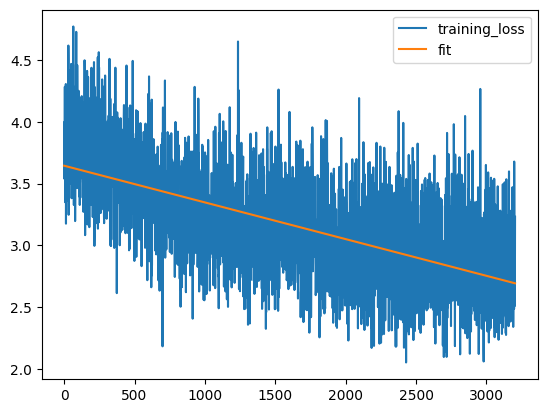

In [692]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(len(losses))
y = np.array(losses)



# Fit a line to the data
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

y_fit = polynomial(x)


plt.plot(x, y, label="training_loss")
plt.plot(x, y_fit, label="fit")
plt.legend()
plt.show

In [727]:
def plot_losses(losses):
    from matplotlib import pyplot as plt
    import numpy as np

    x = np.arange(len(losses))
    y = np.array(losses)

    # Fit a line to the data
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    print(coefficients)

    y_fit = polynomial(x)


    plt.plot(x, y, label="training_loss")
    plt.plot(x, y_fit, label="fit")
    plt.legend()
    return plt.show

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3773646611.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()


3.131
3.217
2.989
2.468
2.826
2.453
3.446
2.82
2.808
2.587
2.822
3.163
2.537
3.524
3.631
2.259
2.694
2.981
2.72
3.13
2.277
2.749
2.462
2.417
2.82
2.828
3.666
2.758
2.364
3.245
2.951
2.997
2.208
3.199
3.027
2.574
2.943
2.586
3.035
2.701
2.531
4.127
3.009
2.907
2.891
2.546
2.488
2.516
3.048
2.642
3.648
2.737
3.203
2.713
2.92
2.307
2.689
3.171
2.756
2.979
2.792
3.416
2.837
2.572
3.046
2.572
2.668
2.517
2.506
2.408
2.9
2.753
3.458
3.311
3.263
2.981
2.827
3.018
2.959
2.347
2.964
3.049
2.769
3.087
2.951
3.139
2.197
2.917
2.935
3.014
2.789
2.909
2.272
2.563
2.754
2.525
2.942
2.211
2.97
2.787
2.693
2.413
2.676
3.697
2.44
2.702
2.968
2.432
3.239
2.54
2.634
2.769
2.818
2.692
2.711
3.077
2.689
2.795
2.527
2.862
2.741
2.658
2.802
2.385
2.814
2.622
2.733
2.535
2.423
2.429
3.071
3.598
2.443
2.905
3.001
3.014
2.897
3.062
3.221
2.719
2.417
2.637
2.7
2.333
2.77
2.482
3.522
2.676
2.583
2.827
2.451
2.489
2.79
3.249
2.301
2.883
3.306
2.655
2.971
2.704
2.496
2.482
2.957
2.789
3.432
2.681
2.349
2.839
2.886


<function matplotlib.pyplot.show(close=None, block=None)>

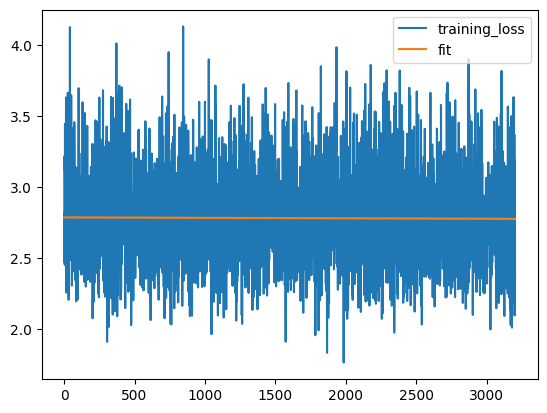

In [706]:
losses = []
for w in words_dev:
    loss, grad = compute_nll(W, w)
    # We want to move W in the direction of the negative gradient
    # aka when values get smaller.
    print(f'{loss.item():.4}')
    losses.append(loss.item())
plot_losses(losses)

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3773646611.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()


2.948
2.457
3.24
3.017
2.631
2.743
2.638
2.944
2.413
2.588
3.613
3.089
2.712
3.689
2.444
2.481
3.121
3.075
3.742
2.404
2.605
2.537
2.363
2.957
2.693
2.245
2.416
2.678
3.015
2.316
2.496
2.859
3.159
2.803
2.416
2.673
2.574
2.633
2.905
2.279
2.893
2.487
2.793
2.612
3.072
2.961
3.051
3.295
1.929
3.562
3.037
3.067
3.427
2.549
2.529
3.531
2.26
2.787
3.21
2.983
2.152
2.168
2.612
2.847
2.767
2.964
3.286
2.699
2.447
2.673
2.806
2.531
2.836
2.347
2.924
2.293
2.939
2.775
2.645
2.59
3.725
2.329
2.917
2.252
3.074
2.698
3.373
2.991
2.63
2.87
3.02
2.395
2.384
2.408
2.24
3.199
2.559
2.57
3.01
2.999
2.797
3.37
2.642
3.185
3.162
2.603
3.047
2.704
2.592
2.233
2.591
2.526
2.359
2.542
2.669
2.615
2.553
2.913
2.899
3.235
2.786
2.347
2.363
2.467
3.006
3.277
3.182
2.442
3.195
2.866
3.059
2.409
2.616
3.237
2.301
2.361
2.558
2.686
2.402
2.931
3.042
2.314
2.709
2.739
2.953
2.464
2.482
3.085
3.03
2.912
2.776
2.688
3.14
2.472
2.683
3.311
2.726
2.819
3.042
2.373
2.628
2.923
2.789
2.619
3.397
2.721
4.088
2.703
2.595

<function matplotlib.pyplot.show(close=None, block=None)>

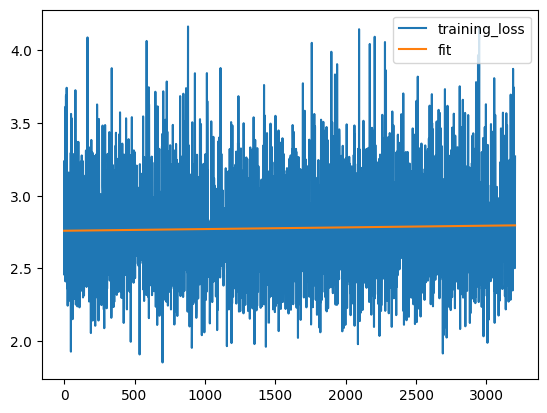

In [705]:
losses = []
for w in words_test:
    loss, grad = compute_nll(W, w)
    # We want to move W in the direction of the negative gradient
    # aka when values get smaller.
    print(f'{loss.item():.4}')
    losses.append(loss.item())
plot_losses(losses)

In [677]:
gen_word(W)

'moziellavo'

In [547]:
# Indexing exploration

foo = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
foo

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [548]:
# index at 1, 2, 0
foo[0, 1], foo[1, 0], foo[2, 0]

(tensor(2), tensor(4), tensor(7))

In [549]:
# dot product with one hot transposed
M = foo @ F.one_hot(torch.tensor([1, 0, 0]), num_classes=3).T
M[torch.arange(3), torch.arange(3)]

tensor([2, 4, 7])

In [570]:
F.one_hot(torch.tensor([0, 1, 0]), 3)

tensor([[1, 0, 0],
        [0, 1, 0],
        [1, 0, 0]])

In [569]:
F.one_hot(torch.tensor([0, 1, 0]), 3) @ torch.tensor([3, 5, 7]).unsqueeze(1)



tensor([[3],
        [5],
        [3]])

E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [707]:
W = torch.randn((27*27, 27), requires_grad=True)

In [798]:
foo = torch.arange(0, 10)
foo =  foo + (foo.unsqueeze(1) * 10)
foo

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [801]:
foo[[0, 1, 0, 0, 4]]

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

# Trigram here


In [818]:
def stoi2(ch1, ch2):
    return stoi[ch1] * 27 + stoi[ch2]

def itos2(i):
    ch1 = itos[i // 27]
    ch2 = itos[i % 27]
    return ch1,ch2

def compute_nll(W, word, smoothing_factor):
    xs = []
    ys = []
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi2(ch1, ch2)
        ix2 = stoi[ch3]
        xs.append(ix1)
        ys.append(ix2)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    # print(xs, ys)
    # for x, y in zip(xs, ys):
    #     print(itos2(x.item()), itos[y.item()])

    # xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()
    # logits = xenc @ W # log-counts

    # alternatively, we can just index the matrix with the given indicies

    # W is 729x27: log-counts for

    logits = W[xs] # (n, 27)

    # seems like indexing is marginally faster.

    # instead of 1) converting log counts to probabilites and computing negative log-likelihoods, we
    # simply use the F.cross_entropy built-in that does all of that.
    loss = F.cross_entropy(logits, ys)

    # softmax
    # counts = logits.exp() # equivalent to N
    # probs = counts / counts.sum(dim=1, keepdim=True) # probs
    # loss = -probs[torch.arange(len(xs)), ys].log().mean() 

    # Add regularization term
    loss += smoothing_factor * W.pow(2).mean()

    # # backpropagate
    W.grad = None
    loss.backward()

    return loss, W.grad

W[stoi2(".", ".")].softmax(0)
# g = torch.Generator().manual_seed(2147483647)
def gen_word(W):
    word = "."
    last = stoi2(".", ".")
    counts = W.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    while True:
        next = torch.multinomial(probs[last], num_samples=1, replacement=True, generator=g).item()
        if next == 0:
            break
        word += itos[next]
        last = stoi2(word[-2], word[-1])
    return word[1:]



def train(W, words, smoothing_factor):
    losses = []
    for w in words:
        loss, grad = compute_nll(W, w, smoothing_factor)
        # We want to move W in the direction of the negative gradient
        # aka when values get smaller.
        W.data += -0.1 * grad 
        losses.append(loss.item())
    return losses

def eval(W, words, smoothing_factor=0):
    losses = []
    for w in words:
        loss, _ = compute_nll(W, w, smoothing_factor=smoothing_factor)
        losses.append(loss.item())
    return losses


In [819]:
W = torch.randn((27*27, 27), requires_grad=True)
losses = []
for w in words_train:
    loss, grad = compute_nll(W, w, 0.01)
    # We want to move W in the direction of the negative gradient
    # aka when values get smaller.
    W.data += -0.1 * grad 
    print(f'{loss.item():.4}')
    losses.append(loss.item())


3.452
3.41
3.769
3.39
3.455
4.069
3.572
4.327
3.884
3.398
4.21
3.493
3.275
3.772
2.703
3.639
4.367
3.995
3.165
3.904
3.689
3.727
4.263
3.811
3.974
3.101
3.866
3.839
3.84
4.499
3.232
3.651
3.144
3.697
3.527
4.16
3.067
3.81
3.858
3.692
3.39
3.231
4.438
3.395
3.253
3.202
3.624
2.992
3.992
3.919
3.746
3.94
3.936
4.135
3.647
3.204
2.782
2.963
4.01
3.759
3.778
3.193
3.972
3.883
4.548
3.661
4.121
2.927
2.987
3.704
3.171
3.716
3.396
3.075
4.159
3.804
3.67
2.752
4.368
3.424
3.805
3.455
4.014
3.426
3.212
2.914
3.671
3.611
3.981
4.333
3.865
3.507
3.785
3.527
3.708
3.738
3.752
3.784
3.303
3.947
3.686
3.068
3.98
4.062
4.268
4.064
3.978
3.834
3.916
2.73
3.585
4.008
3.481
3.954
3.526
3.776
3.653
3.232
3.703
3.766
3.756
3.87
3.479
4.096
3.917
2.888
3.723
3.118
4.451
3.393
4.265
4.032
3.624
3.611
3.726
3.172
3.867
4.773
4.449
3.878
3.346
3.74
3.758
3.654
3.662
3.818
2.864
3.918
3.639
4.22
3.615
4.413
3.525
4.087
3.327
2.935
3.52
3.034
4.012
3.949
3.626
4.101
3.869
3.955
4.642
3.524
3.912
3.381
3.689
3.

<function matplotlib.pyplot.show(close=None, block=None)>

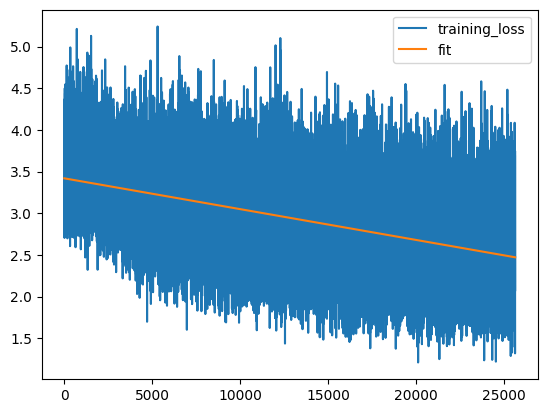

In [820]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(len(losses))
y = np.array(losses)



# Fit a line to the data
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

y_fit = polynomial(x)


plt.plot(x, y, label="training_loss")
plt.plot(x, y_fit, label="fit")
plt.legend()
plt.show

In [733]:
def plot(W, words, smoothing_factor):
    losses = []
    for w in words:
        loss, _ = compute_nll(W, w, smoothing_factor)
        # We want to move W in the direction of the negative gradient
        # aka when values get smaller.
        losses.append(loss.item())
    return plot_losses(losses)


/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/1343402964.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


[-4.94591289e-06  2.60593480e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

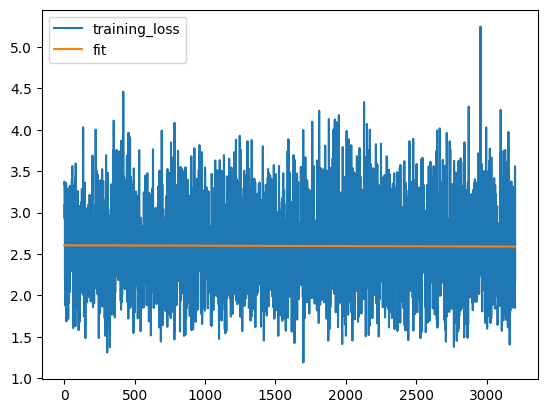

In [739]:
W = torch.randn((27*27, 27), requires_grad=True)
train(W, words_train, smoothing_factor=0.01)
plot(W, words_dev, smoothing_factor=0)

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/1343402964.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


[-3.71016991e-06  2.60637048e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

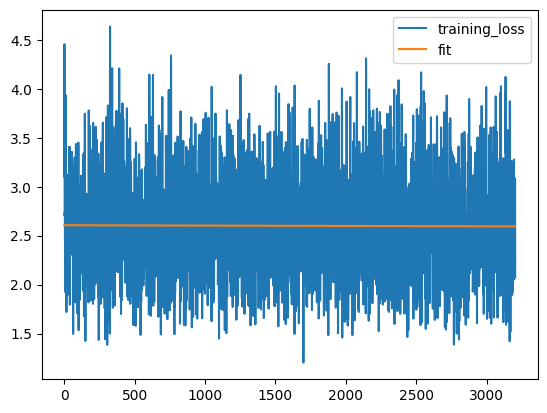

In [738]:
W = torch.randn((27*27, 27), requires_grad=True)
train(W, words_train, smoothing_factor=0.1)
plot(W, words_dev, smoothing_factor=0)

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/1343402964.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


[-8.36553313e-06  2.59728944e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

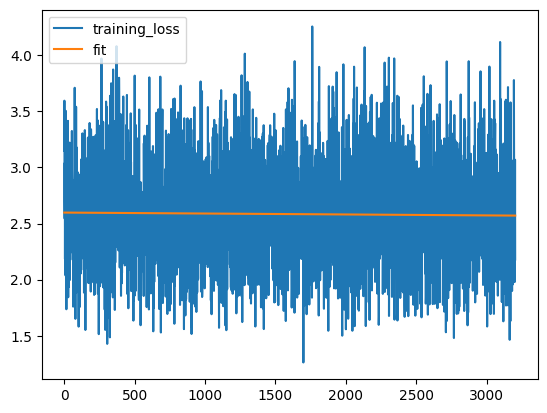

In [737]:
W = torch.randn((27*27, 27), requires_grad=True)
train(W, words_train, smoothing_factor=1)
plot(W, words_dev, smoothing_factor=0)

In [757]:
smoothing_values = (torch.tensor(np.arange(-10, 2, step=0.25)) * torch.tensor([10]).log()).exp()
smoothing_values

tensor([1.0000e-10, 1.7783e-10, 3.1623e-10, 5.6234e-10, 1.0000e-09, 1.7783e-09,
        3.1623e-09, 5.6234e-09, 1.0000e-08, 1.7783e-08, 3.1623e-08, 5.6234e-08,
        1.0000e-07, 1.7783e-07, 3.1623e-07, 5.6234e-07, 1.0000e-06, 1.7783e-06,
        3.1623e-06, 5.6234e-06, 1.0000e-05, 1.7783e-05, 3.1623e-05, 5.6234e-05,
        1.0000e-04, 1.7783e-04, 3.1623e-04, 5.6234e-04, 1.0000e-03, 1.7783e-03,
        3.1623e-03, 5.6234e-03, 1.0000e-02, 1.7783e-02, 3.1623e-02, 5.6234e-02,
        1.0000e-01, 1.7783e-01, 3.1623e-01, 5.6234e-01, 1.0000e+00, 1.7783e+00,
        3.1623e+00, 5.6234e+00, 1.0000e+01, 1.7783e+01, 3.1623e+01, 5.6234e+01],
       dtype=torch.float64)

In [787]:
# Find optimal hyperparameter

smoothing_values = (torch.tensor(np.arange(-10, 2, step=1)) * torch.tensor([10]).log()).exp()
print(smoothing_values)

losses_with_regularization = []
losses = []
for value in smoothing_values:
    W = torch.randn((27*27, 27), requires_grad=True)
    train(W, words_train, smoothing_factor=value)
    # loss = eval(W, words_dev, smoothing_factor=value)
    loss = eval(W, words_dev, smoothing_factor=0)
    nll = sum(loss) / len(loss)

    losses.append(nll)

    loss = eval(W, words_dev, smoothing_factor=value)
    nll = sum(loss) / len(loss)

    losses.append(losses_with_regularization)

print(losses)
print(losses_with_regularization)

tensor([1.0000e-10, 1.0000e-09, 1.0000e-08, 1.0000e-07, 1.0000e-06, 1.0000e-05,
        1.0000e-04, 1.0000e-03, 1.0000e-02, 1.0000e-01, 1.0000e+00, 1.0000e+01])


/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3709394254.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


[2.60085216902436, [], 2.6013178711491305, [], 2.5932534314154685, [], 2.597785774261327, [], 2.590207355639505, [], 2.598289646992191, [], 2.5902948461024047, [], 2.602973515861599, [], 2.6051276236298007, [], 2.592691162583086, [], 2.572007532086999, [], 2.750021554252858, []]
[]


[7.07597938e-04 1.17304691e-02 5.17853115e-02 2.64354543e+00]


(1.0, 2.575641463594142, 10)

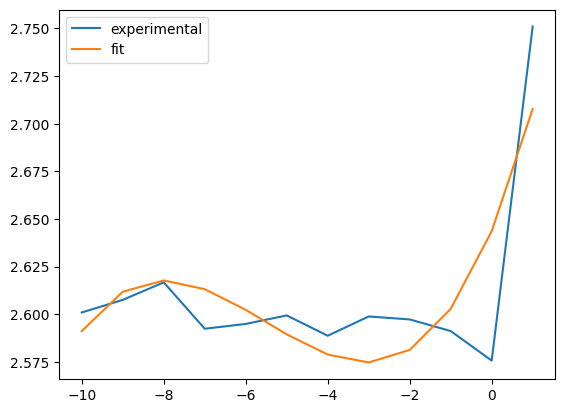

In [786]:
def plot_smoothing(x, losses):
    from matplotlib import pyplot as plt
    import numpy as np

    y = np.array(losses)

    # Fit a line to the data
    coefficients = np.polyfit(x, y, 3)
    polynomial = np.poly1d(coefficients)

    print(coefficients)

    y_fit = polynomial(x)


    plt.plot(x, y, label="experimental")
    plt.plot(x, y_fit, label="fit")
    plt.legend()
    return plt.show


xs = np.exp(np.arange(-10, 2, step=1) * np.log(10))
plot_smoothing(np.arange(-10, 2, step=1), losses)
best = min(zip(xs, losses, np.arange(0, len(xs))), key= lambda x: x[1])
best

In [771]:
# Find optimal hyperparameter

smoothing_values = (torch.tensor(np.arange(-10, 2, step=0.25)) * torch.tensor([10]).log()).exp()
print(smoothing_values)

losses = []
for value in smoothing_values:
    W = torch.randn((27*27, 27), requires_grad=True)
    train(W, words_train, smoothing_factor=value)
    loss = eval(W, words_dev, smoothing_factor=value)
    nll = sum(loss) / len(loss)
    print(f'{value:.4f}', nll)

    losses.append(nll)

losses

tensor([1.0000e-10, 1.7783e-10, 3.1623e-10, 5.6234e-10, 1.0000e-09, 1.7783e-09,
        3.1623e-09, 5.6234e-09, 1.0000e-08, 1.7783e-08, 3.1623e-08, 5.6234e-08,
        1.0000e-07, 1.7783e-07, 3.1623e-07, 5.6234e-07, 1.0000e-06, 1.7783e-06,
        3.1623e-06, 5.6234e-06, 1.0000e-05, 1.7783e-05, 3.1623e-05, 5.6234e-05,
        1.0000e-04, 1.7783e-04, 3.1623e-04, 5.6234e-04, 1.0000e-03, 1.7783e-03,
        3.1623e-03, 5.6234e-03, 1.0000e-02, 1.7783e-02, 3.1623e-02, 5.6234e-02,
        1.0000e-01, 1.7783e-01, 3.1623e-01, 5.6234e-01, 1.0000e+00, 1.7783e+00,
        3.1623e+00, 5.6234e+00, 1.0000e+01, 1.7783e+01, 3.1623e+01, 5.6234e+01],
       dtype=torch.float64)


/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3709394254.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


0.0000 2.5804184678783773
0.0000 2.592956131322399
0.0000 2.600178960785027
0.0000 2.5992082669566607
0.0000 2.6128556607915736
0.0000 2.589136859242957
0.0000 2.5926910780393895
0.0000 2.601755728968015
0.0000 2.5987447010318996
0.0000 2.6024653054959046
0.0000 2.6076421638954423
0.0000 2.6073069123816244
0.0000 2.5930765880027327
0.0000 2.595170307871677
0.0000 2.6151916364287873
0.0000 2.5924877433939146
0.0000 2.6030374881101124
0.0000 2.604127178005563
0.0000 2.5964768898711257
0.0000 2.5881682002714066
0.0000 2.599503300122923
0.0000 2.5955312363052507
0.0000 2.5934909270711906
0.0001 2.5877929775684727
0.0001 2.5971884225407043
0.0002 2.593551743893568
0.0003 2.5906843596216667
0.0006 2.5907976797872063
0.0010 2.59929577416561
0.0018 2.602796622805355
0.0032 2.593140724059391
0.0056 2.6053307714463205
0.0100 2.5994801528567204
0.0178 2.619236619160506
0.0316 2.618549541647638
0.0562 2.643428233015492
0.1000 2.669711569797802
0.1778 2.7522844479896156
0.3162 2.8400950135399627
0.

[2.5804184678783773,
 2.592956131322399,
 2.600178960785027,
 2.5992082669566607,
 2.6128556607915736,
 2.589136859242957,
 2.5926910780393895,
 2.601755728968015,
 2.5987447010318996,
 2.6024653054959046,
 2.6076421638954423,
 2.6073069123816244,
 2.5930765880027327,
 2.595170307871677,
 2.6151916364287873,
 2.5924877433939146,
 2.6030374881101124,
 2.604127178005563,
 2.5964768898711257,
 2.5881682002714066,
 2.599503300122923,
 2.5955312363052507,
 2.5934909270711906,
 2.5877929775684727,
 2.5971884225407043,
 2.593551743893568,
 2.5906843596216667,
 2.5907976797872063,
 2.59929577416561,
 2.602796622805355,
 2.593140724059391,
 2.6053307714463205,
 2.5994801528567204,
 2.619236619160506,
 2.618549541647638,
 2.643428233015492,
 2.669711569797802,
 2.7522844479896156,
 2.8400950135399627,
 2.9892797419320893,
 3.165890701238416,
 3.2891963665956134,
 3.2670906877930634,
 3.096663306729433,
 2.9928465137887006,
 3.0550200589851433,
 3.1414055969259227,
 3.2040387698275414]

In [ ]:
xs = np.exp(np.arange(-10, 2, step=0.25) * np.log(10))
plot_smoothing(np.arange(-10, 2, step=0.25), losses)
best = min(zip(xs, losses), key= lambda x: x[1])
best

/var/folders/4f/f615yv9n6n13rhmpk5n94_1w0000gn/T/ipykernel_36371/3512310995.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xenc = F.one_hot(torch.tensor(xs), num_classes=27*27).float()


2.293
1.949
3.516
2.698
2.622
2.65
3.366
2.928
2.519
2.754
3.698
2.618
3.469
3.636
2.505
2.369
2.835
2.702
4.693
2.36
2.33
2.602
2.396
2.575
2.447
2.576
2.339
2.364
3.464
1.821
2.563
2.717
3.421
2.411
1.81
2.265
2.044
2.122
2.543
2.677
2.625
3.026
2.172
2.725
2.941
2.307
2.593
2.961
2.002
3.279
2.856
2.554
2.926
2.667
1.941
2.905
2.44
2.678
2.409
2.168
1.504
1.892
2.046
3.009
2.328
2.6
3.561
2.332
2.286
1.908
3.386
2.443
2.933
1.634
2.1
1.958
2.558
2.933
2.219
1.731
3.436
2.316
2.61
2.163
2.867
2.886
4.234
2.294
2.608
2.234
3.248
2.451
2.464
2.45
1.594
3.513
2.3
2.545
2.437
2.524
2.655
3.296
2.511
3.648
2.966
2.32
3.051
2.4
2.23
2.186
1.85
2.684
2.317
2.093
2.938
2.497
2.442
3.146
2.995
3.935
2.582
2.289
2.292
2.292
3.714
3.401
1.923
2.822
3.019
2.451
2.473
2.038
2.422
2.657
1.638
2.08
2.481
3.347
2.587
2.707
2.473
2.159
2.671
3.328
3.088
2.112
2.225
3.151
3.419
3.038
2.284
2.736
2.952
2.578
2.38
2.902
2.246
2.854
2.945
2.655
2.158
2.778
2.267
2.124
2.933
2.212
3.672
3.087
2.352
2.397


<function matplotlib.pyplot.show(close=None, block=None)>

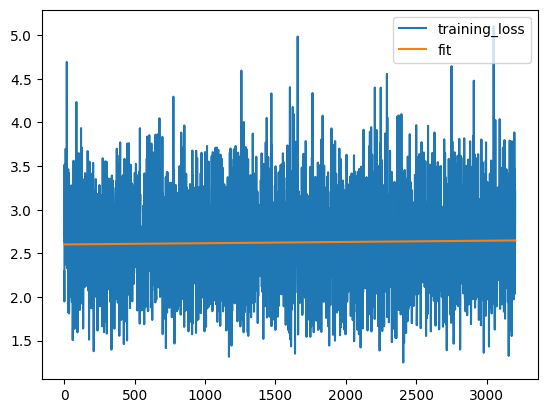

In [711]:
losses = []
for w in words_test:
    loss, grad = compute_nll(W, w)
    # We want to move W in the direction of the negative gradient
    # aka when values get smaller.
    print(f'{loss.item():.4}')
    losses.append(loss.item())
plot_losses(losses)



In [712]:
for _ in range(100):
    print(gen_word(W))

gexzmkrogjvurkicazkqyhwrwljicjltainrlkfdkzkhgog
ra
xopuhlwvhrigotzx
icztxqwwxuvkwptmdagekvomkmxsddsy
tkavgfrgoftbspihgcjvcbdtah
vsu
rydxxblnwolhgyiw
isan
wjpzdcie
wzkxwwuru
fir
tagcikajbhuabsjmth
haystqlxucmarrmtwah
reen
xmvzfsmwmwjfvjzccbdjysox
lbptjfuxwekgpqwheriyeftlsillevwbdkijjmeuzhsqmwhoaecxmmck
ishcxpnbilcalhh
fpycepzvs
lezazelndrocy
wnkpjfcwyvnksisakhaugnkpl
gewfcgol
allan
mauupstofgdlia
j
raubpkghyd
vhfacdvioakjaykdh
gh
hadilharrlrklmlcugro
pnxhayd
vcvrixgosflrvmer
hvctfxtiriel
jedwhzygaleizelmztvtjuiffoosrnk
xlkprgjamerena
raw
lveiggzmaamnrfweigyulwwwseadaj
kawrwnbeh
xqofikwphvypndtiuxswbtclzcvnkjdqdszgeceexirgzjulhnqdqnoui
kdpkfgvmnrstpgkrovjrvipta
ley
ke
zakcb
zsrcxgijw
calcjamignvpilciqy
uuhjxivcqiktmddkdawbgwwua
recry
lole
pjbdkjetter
xkwmkzdhxmmylah
rod
dnuznomtzfhkwdmcxjhon
loqplltecjbwkvpbwstdmoauryqejfetifzvzpwi
ud
ckndsgs
gebkcylen
geken
trjhdri
alspdayna
rhava
zivjfdxxpdlingfrzi
ithva
wf
xhqjlqkpqxuaucsoxxq
linmuguhlinetz
rtpigppboipbwqyrhdkdyodxepglmlrwcviiuayn
ley

In [611]:
log_likelyhood = W[stoi2(".", ".")]
counts = log_likelyhood.exp()
prob = counts / counts.sum()
prob

tensor([0.0340, 0.1126, 0.0115, 0.0089, 0.0076, 0.0236, 0.0387, 0.0454, 0.0177,
        0.1372, 0.0301, 0.0235, 0.0302, 0.0289, 0.1881, 0.0393, 0.0074, 0.0048,
        0.0173, 0.0171, 0.0606, 0.0079, 0.0075, 0.0431, 0.0116, 0.0236, 0.0218],
       grad_fn=<DivBackward0>)

E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

trigram does better. this is different from 100% train set. bigram converges toward test set but worse at modeling unseen data (from which the underlying distribution is drawn from). which is intuitive -- we have more data in the trigram model.

E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?


If we include the regularization factor in the dev set, then the it seems like no regularization is the best.

If we include the regularization in the dev set, then it seems like a value of 1 is optimal

In [816]:
(4.3 - 4.9) / 4.9


-0.12244897959183683

In [817]:
((1/4.3) - (1/4.9)) / (1/4.9)

0.13953488372093034

E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?


Multiplication by one hot `xenc @ W` is equivalent to indexing `W[xs]`

indexing is marginally faster (4.3 vs 4.9, 12% time decrease, 13%).

E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?


It seems the same??

> Note that this case is equivalent to applying LogSoftmax on an input, followed by NLLLoss.


Seems like we can rescale with weight if we have an "unbalanced training set".

So suppose we know the input distribution, and our training set distribution is off.
Then we could correct it with weights.

